## Import all the modules

In [14]:
from fer import FER
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import matplotlib.pyplot as plt 
%matplotlib inline
import os
import cv2

In [15]:
driver = webdriver.Chrome('./sources/chromedriver.exe')

C:\Users\Dark\AppData\Local\Temp\ipykernel_27280\480797217.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./sources/chromedriver.exe')


## Open chrome for opening the playlist

In [16]:
img = cv2.imread("./sources/neutral.jpg")

## Reading a pre-saved image

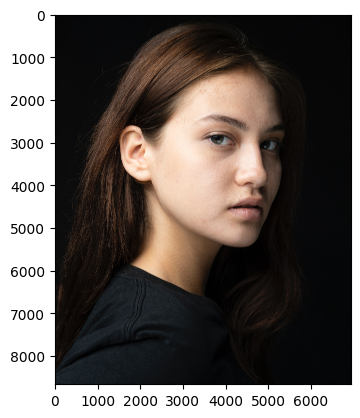

In [17]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Reading all the emotions using FER module

In [18]:
emo_detector = FER(mtcnn=True)
captured_emotions = emo_detector.detect_emotions(img)

1/1 [==============================] - 0s 92ms/step


## Print all the emotions from the image

[{'box': [2505, 1381, 2961, 3917], 'emotions': {'angry': 0.05, 'disgust': 0.0, 'fear': 0.1, 'happy': 0.0, 'sad': 0.72, 'surprise': 0.0, 'neutral': 0.12}}]


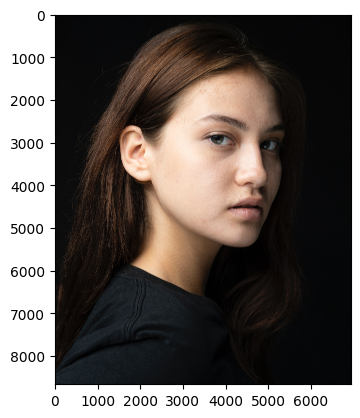

In [19]:
print(captured_emotions)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Accessing the dominant emotion by it's score

In [20]:
dominant_emotion, emotion_score = emo_detector.top_emotion(img)
print(dominant_emotion, emotion_score)

1/1 [==============================] - 0s 25ms/step
sad 0.72


## By dominant emotion we are directing to a playlist

In [21]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [22]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
faces = faceCascade.detectMultiScale(gray,1.1,4)
for(x,y,w,h) in faces:
    cv2.rectangle(img, (x,y) , (x+w,y+h), (255,255,255), 20)

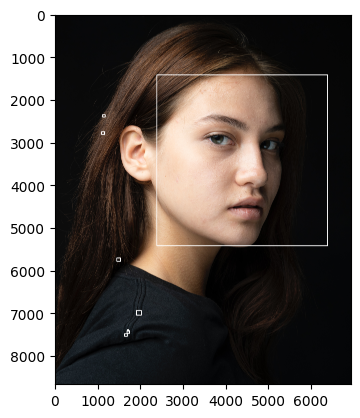

In [23]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [24]:
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img,
           dominant_emotion,
           (1000,1000),
           font,20,
           (255,255,255),
           20,
           cv2.LINE_4);

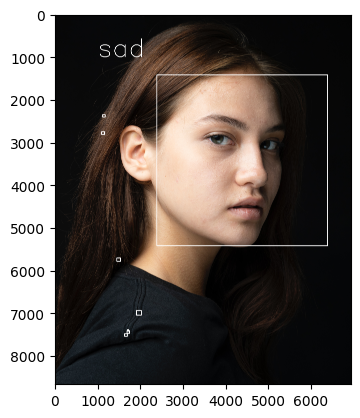

In [25]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
if dominant_emotion == "happy":
    driver.get("https://open.spotify.com/playlist/4nd7oGDNgfM0rv28CQw9WQ")

elif dominant_emotion == "sad":
    driver.get("https://open.spotify.com/playlist/1jJoJu3y2v0pl2fQb4FpcR")
    
elif dominant_emotion == "angry":
    driver.get("https://open.spotify.com/playlist/2SAlj6IpdtsyI7qqU0ZKb2")
    
elif dominant_emotion == "fear":
    driver.get("https://open.spotify.com/album/1KwWAVnZPhsc9QlQGrM702")
    
elif dominant_emotion == "disgust":
    driver.get("https://open.spotify.com/playlist/7diEjS9gADBgVpDww9J1r3")
    
elif dominant_emotion == "neutral":
    driver.get("https://open.spotify.com/playlist/0ffnLxCftwLzmXDO7DJEXc")
    
elif dominant_emotion == "surprise":
    driver.get("https://open.spotify.com/playlist/2dBjcjjYckHQlrn8iHm7c1")

else:
    print("no face detected") 